### Random Forest 

In [23]:
import pandas as pd
import numpy as np

import Libraries

In [24]:


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import matplotlib.pyplot as plt
import plotly.express as px

Data Gathering

In [25]:
df = pd.read_csv(r"C:\Users\Divyanshu\Downloads\archive (3)\loan_approval_dataset.csv")
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


EDA

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [27]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

removing front spaces of column names

In [28]:
column_names=[]
for i in df.columns:
    # print(i.strip())
    column_names.append(i.strip())
    
df.columns=column_names    

In [29]:
df['education'] = df['education'].str.strip().str.title() # for space in between 
df['education'].replace({'Graduate':1,'Not Graduate':0},inplace=True) # Encoding

C:\Users\Divyanshu\AppData\Local\Temp\ipykernel_17044\315268453.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['education'].replace({'Graduate':1,'Not Graduate':0},inplace=True) # Encoding
C:\Users\Divyanshu\AppData\Local\Temp\ipykernel_17044\315268453.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcastin

In [30]:
df['self_employed'] = df['self_employed'].str.strip().str.title() # for space in between 
df['self_employed'].replace({'No':1,'Yes':0},inplace=True)

C:\Users\Divyanshu\AppData\Local\Temp\ipykernel_17044\2722401071.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['self_employed'].replace({'No':1,'Yes':0},inplace=True)
C:\Users\Divyanshu\AppData\Local\Temp\ipykernel_17044\2722401071.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sel

In [31]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [32]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,1,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,0,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,1,1,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,1,1,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,0,0,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1,0,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,0,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,0,1,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,0,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


Model Training


In [33]:
x=df.drop(['loan_status','loan_id'],axis=1)
x

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,1,1,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,0,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,1,1,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,1,1,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,0,0,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1,0,1000000,2300000,12,317,2800000,500000,3300000,800000
4265,0,0,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4266,2,0,1,6500000,23900000,18,457,1200000,12400000,18100000,7300000
4267,1,0,1,4100000,12800000,8,780,8200000,700000,14100000,5800000


In [34]:
y=df.loan_status
y

0        Approved
1        Rejected
2        Rejected
3        Rejected
4        Rejected
          ...    
4264     Rejected
4265     Approved
4266     Rejected
4267     Approved
4268     Approved
Name: loan_status, Length: 4269, dtype: object

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=1, test_size=0.2, stratify=y)
x_train

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
599,1,0,0,4900000,16800000,12,758,1700000,2700000,11100000,5900000
509,1,1,0,9900000,39500000,12,808,11800000,3700000,30200000,13500000
1806,1,1,0,6200000,16200000,4,888,-100000,12000000,24300000,4000000
2693,3,0,0,8200000,16500000,18,371,19000000,1200000,18500000,8200000
1850,1,1,0,7800000,25100000,18,766,6900000,7200000,16600000,10200000
...,...,...,...,...,...,...,...,...,...,...,...
3178,5,0,0,5800000,14000000,14,418,3900000,10400000,15100000,6800000
2457,1,1,0,2100000,4300000,20,896,100000,2300000,7500000,2300000
786,4,1,1,2200000,8600000,6,601,2700000,2900000,6700000,3300000
2001,4,0,1,3900000,8800000,14,527,4600000,4900000,14900000,3100000


In [36]:
rf_clf_model = RandomForestClassifier(n_estimators=100,
                        criterion='gini',
                        max_depth=None,
                        min_samples_split=2,
                        min_samples_leaf=1,
                        max_features='sqrt',
                        bootstrap=True,
                        oob_score=False,
                        n_jobs=-1,
                        random_state=None,
                        # verbose=1
                    )
rf_clf_model.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1)

### Evaluation

In [37]:
# Training Data Evaluation
y_pred_train = rf_clf_model.predict(x_train)
cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)
print("*"*50)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[2125    0]
 [   0 1290]]
**************************************************
Accuracy : 1.0
**************************************************
Classification Report :
               precision    recall  f1-score   support

    Approved       1.00      1.00      1.00      2125
    Rejected       1.00      1.00      1.00      1290

    accuracy                           1.00      3415
   macro avg       1.00      1.00      1.00      3415
weighted avg       1.00      1.00      1.00      3415



In [38]:
# Testing Data Evaluation
y_pred_test = rf_clf_model.predict(x_test)
cnf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy :",accuracy)
print("*"*50)

clf_report = classification_report(y_test, y_pred_test)
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[528   3]
 [ 17 306]]
**************************************************
Accuracy : 0.9765807962529274
**************************************************
Classification Report :
               precision    recall  f1-score   support

    Approved       0.97      0.99      0.98       531
    Rejected       0.99      0.95      0.97       323

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854



### Hyperparameter Tuning

In [39]:
rf_clf_model= RandomForestClassifier(bootstrap=True,
                        oob_score=False,
                        n_jobs=-1,
                        random_state=2,
                        verbose=0,
                        )

hyp = {"n_estimators"  : range(10,200,10),
        "criterion" : ['gini', 'entropy'],
        "max_depth" : range(4,8),
        "min_samples_split" : range(8,12),
        "min_samples_leaf" : range(3,8)}

gscv_rf_clf = GridSearchCV(rf_clf_model, hyp, n_jobs=-1, cv=3, verbose=1)
gscv_rf_clf.fit(x_train, y_train)

Fitting 3 folds for each of 3040 candidates, totalling 9120 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=2),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(4, 8),
                         'min_samples_leaf': range(3, 8),
                         'min_samples_split': range(8, 12),
                         'n_estimators': range(10, 200, 10)},
             verbose=1)

In [40]:
rf_clf_model = RandomForestClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5,
                       min_samples_split=8, n_estimators=190, n_jobs=-1,
                       random_state=2, oob_score=True)

rf_clf_model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5,
                       min_samples_split=8, n_estimators=190, n_jobs=-1,
                       oob_score=True, random_state=2)

In [41]:
# Training Data Evaluation
y_pred_train = rf_clf_model.predict(x_train)
cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)
print("*"*50)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[2045   80]
 [  26 1264]]
**************************************************
Accuracy : 0.9689604685212299
**************************************************
Classification Report :
               precision    recall  f1-score   support

    Approved       0.99      0.96      0.97      2125
    Rejected       0.94      0.98      0.96      1290

    accuracy                           0.97      3415
   macro avg       0.96      0.97      0.97      3415
weighted avg       0.97      0.97      0.97      3415



In [42]:
# Testing Data Evaluation
y_pred_test = rf_clf_model.predict(x_test)
cnf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy :",accuracy)
print("*"*50)

clf_report = classification_report(y_test, y_pred_test)
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[511  20]
 [ 13 310]]
**************************************************
Accuracy : 0.9613583138173302
**************************************************
Classification Report :
               precision    recall  f1-score   support

    Approved       0.98      0.96      0.97       531
    Rejected       0.94      0.96      0.95       323

    accuracy                           0.96       854
   macro avg       0.96      0.96      0.96       854
weighted avg       0.96      0.96      0.96       854



no_of_dependents            0.003632
education                   0.000724
self_employed               0.000926
income_annum                0.010719
loan_amount                 0.028861
loan_term                   0.109215
cibil_score                 0.792883
residential_assets_value    0.013022
commercial_assets_value     0.013996
luxury_assets_value         0.015571
bank_asset_value            0.010449
dtype: float64


<Axes: >

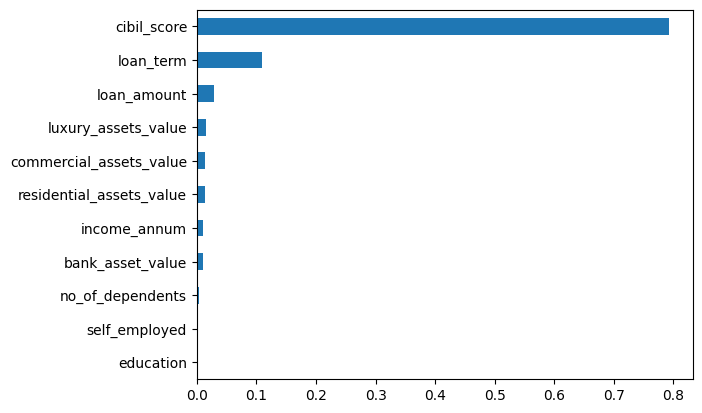

In [43]:
s1 = pd.Series(rf_clf_model.feature_importances_, index = x.columns)
print(s1)
s1.sort_values().plot(kind = 'barh')

In [44]:
rf_clf_model.oob_score_

0.9654465592972181

In [45]:
import pickle

# Save trained model
with open("rf_model.pkl", "wb") as f:
    pickle.dump(rf_clf_model, f)
